In [9]:
#Import Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Carregar o conjunto de dados de treinamento
train_df = pd.read_csv('train.csv')

In [2]:
# Estatísticas descritivas das pontuações
score_stats = train_df['score'].describe()
print(score_stats)

count    17307.000000
mean         2.948402
std          1.044899
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: score, dtype: float64


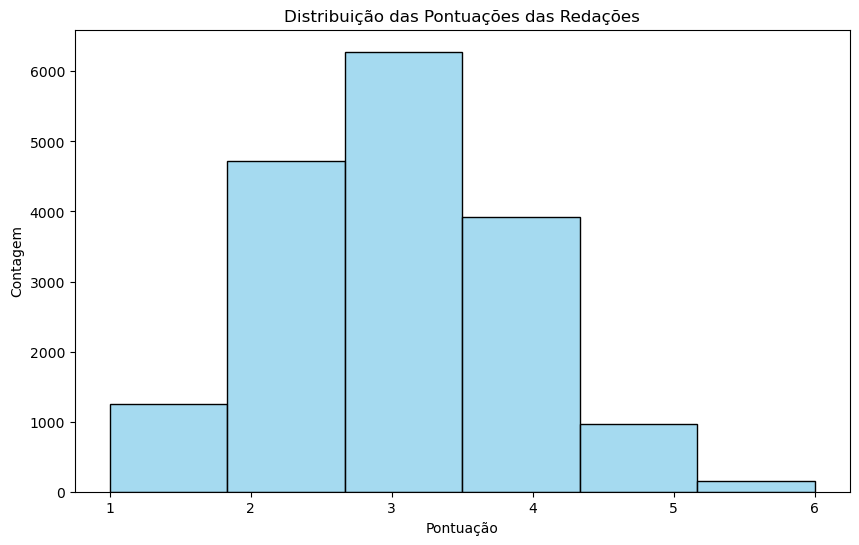

In [3]:
# Histograma das pontuações
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='score', bins=6, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribuição das Pontuações das Redações')
plt.xlabel('Pontuação')
plt.ylabel('Contagem')
plt.show()

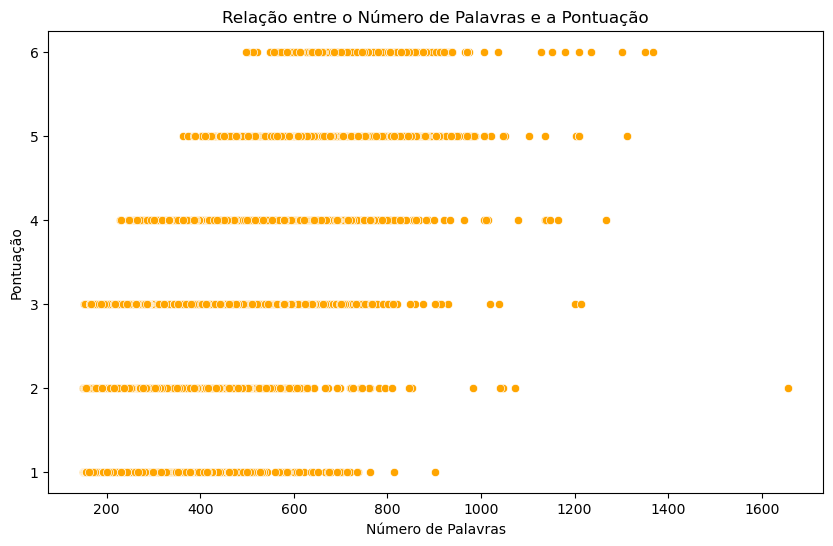

In [4]:
# Calcular o número de palavras em cada redação
train_df['num_words'] = train_df['full_text'].apply(lambda x: len(x.split()))

# Visualizar a relação entre o número de palavras e a pontuação
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='num_words', y='score', color='orange')
plt.title('Relação entre o Número de Palavras e a Pontuação')
plt.xlabel('Número de Palavras')
plt.ylabel('Pontuação')
plt.show()

In [56]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Baixe os recursos necessários do NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Função para limpeza de texto, remoção de pontuações, caracteres especiais e números
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove pontuações e caracteres especiais
    text = re.sub(r'\d+', '', text)  # Remove números
    text = text.lower()  # Converte para minúsculas
    return text

# Função para tokenização de texto
def tokenize_text(text):
    tokens = word_tokenize(text)  # Tokenização
    return tokens

# Aplicar as funções de limpeza e tokenização nas redações
train_df['clean_text'] = train_df['full_text'].apply(clean_text)
train_df['tokens'] = train_df['clean_text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\55219\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\55219\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\55219\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Inicializar o lematizador
lemmatizer = WordNetLemmatizer()

# Função para lematização de texto
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Aplicar a lematização nas redações
train_df['lemmatized_tokens'] = train_df['tokens'].apply(lemmatize_text)

In [44]:
#Função para calcular o número total de palavras em uma redação
def count_words(text):
    words = text.split()
    return len(words)

# Função para calcular o número total de frases em uma redação (utilizando o ponto final como indicador de fim de frase)
def count_sentences(text):
    sentences = text.split('.')
    return len(sentences)

# Função para calcular a proporção de palavras únicas em uma redação
def unique_words_ratio(text):
    words = text.split()
    unique_words = set(words)
    if len(words) == 0:
        return 0
    return len(unique_words) / len(words)

# Aplicar as funções de extração de características nas redações
train_df['num_words'] = train_df['full_text'].apply(count_words)
train_df['sentence_count'] = train_df['full_text'].apply(count_sentences)
train_df['unique_words_ratio'] = train_df['full_text'].apply(unique_words_ratio)

In [51]:
#Função para calcular o número total de palavras em uma redação
def count_words(text):
    words = text.split()
    return len(words)

# Função para calcular o número total de frases em uma redação (utilizando o ponto final como indicador de fim de frase)
def count_sentences(text):
    sentences = text.split('.')
    return len(sentences)

# Função para calcular a proporção de palavras únicas em uma redação
def unique_words_ratio(text):
    words = text.split()
    unique_words = set(words)
    if len(words) == 0:
        return 0
    return len(unique_words) / len(words)

# Aplicar as funções de extração de características nas redações
test_df['num_words'] = test_df['full_text'].apply(count_words)
test_df['sentence_count'] = test_df['full_text'].apply(count_sentences)
test_df['unique_words_ratio'] = test_df['full_text'].apply(unique_words_ratio)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Ajustar e transformar o texto das redações em vetores TF-IDF
tfidf_features = tfidf_vectorizer.fit_transform(train_df['full_text'])

In [46]:
# Definir variáveis de entrada (X) e saída (y)
X = train_df[['num_words', 'sentence_count', 'unique_words_ratio']]  # Características extraídas
y = train_df['score']  # Pontuações das redações

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Dicionário de modelos com hiperparâmetros
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVR(),
    'Neural Network': MLPRegressor(max_iter=1000)
}

# Dicionário de hiperparâmetros para cada modelo
params = {
    'Decision Tree': {'max_depth': [3, 5, 7, None]},
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)]}
}

# Dicionário para armazenar as previsões
predictions = {}

# Treinar e avaliar os modelos com GridSearchCV
for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'{name}: Mean Squared Error = {mse}')
        cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        print(f'{name}: Cross-validated Mean Squared Error = {cross_val_scores.mean()}')
        predictions[name] = y_pred  # Armazenar as previsões
    else:
        # Inicializar o GridSearchCV com o modelo e os hiperparâmetros correspondentes
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
    
        # Melhor modelo encontrado pelo GridSearchCV
        best_model = grid_search.best_estimator_
    
        # Treinar o melhor modelo
        best_model.fit(X_train, y_train)
    
        # Prever e calcular o MSE no conjunto de teste
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'{name}: Best Model - Mean Squared Error = {mse}')
    
        # Cross-validated Mean Squared Error com o melhor modelo
        cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
        print(f'{name}: Best Model - Cross-validated Mean Squared Error = {cross_val_scores.mean()}')
        
        predictions[name] = y_pred  # Armazenar as previsões

Linear Regression: Mean Squared Error = 0.5397208142517045
Linear Regression: Cross-validated Mean Squared Error = -0.5634546751538684
Decision Tree: Best Model - Mean Squared Error = 0.5187274361380492
Decision Tree: Best Model - Cross-validated Mean Squared Error = -0.5378976466727217


C:\Users\55219\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\55219\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\55219\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Best Model - Mean Squared Error = 0.6045638359329867


C:\Users\55219\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\55219\anaconda5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: Best Model - Cross-validated Mean Squared Error = -0.6183630888445668
Support Vector Machine: Best Model - Mean Squared Error = 0.544085976490808
Support Vector Machine: Best Model - Cross-validated Mean Squared Error = -0.5479327148024445
Neural Network: Best Model - Mean Squared Error = 0.6441146366981196
Neural Network: Best Model - Cross-validated Mean Squared Error = -0.5758367720247151


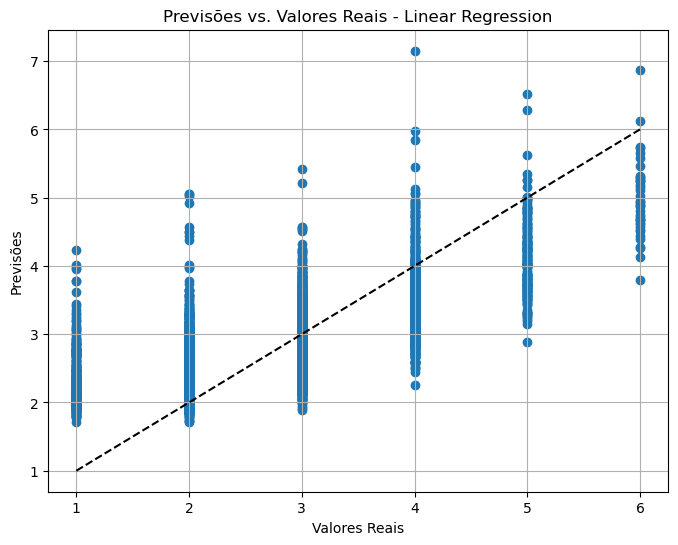

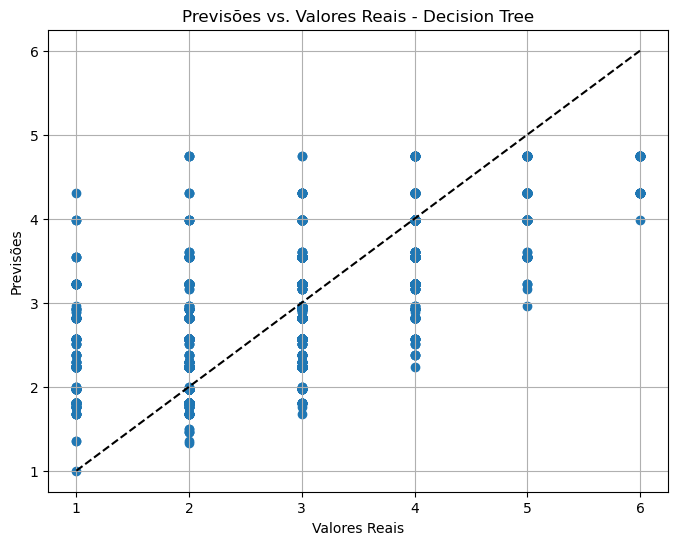

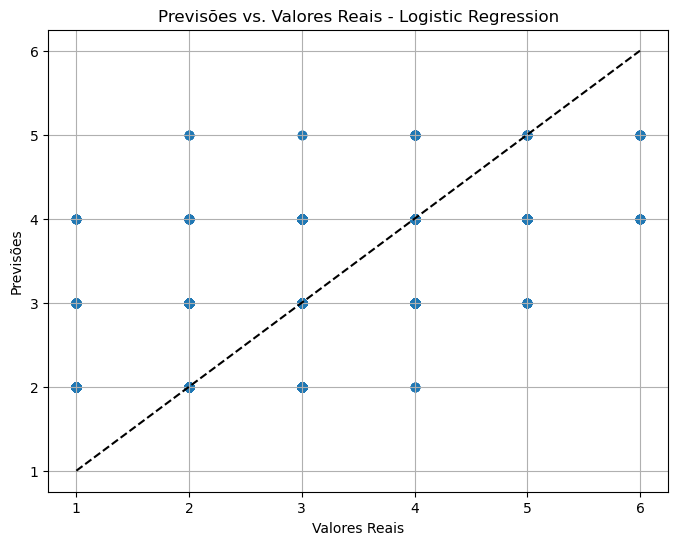

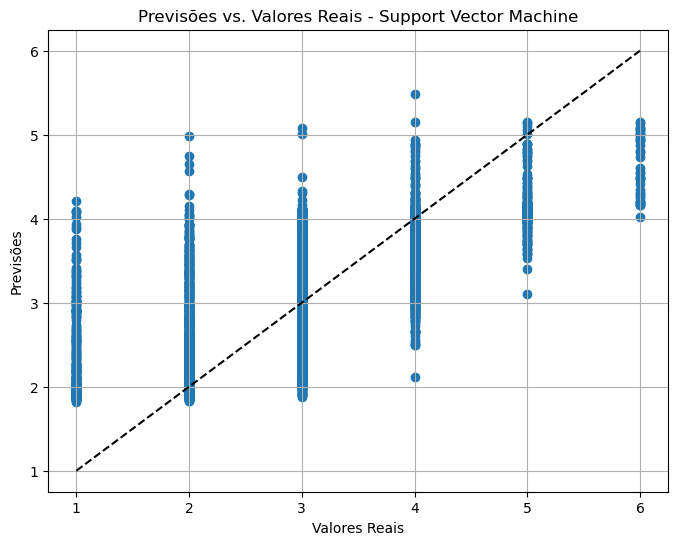

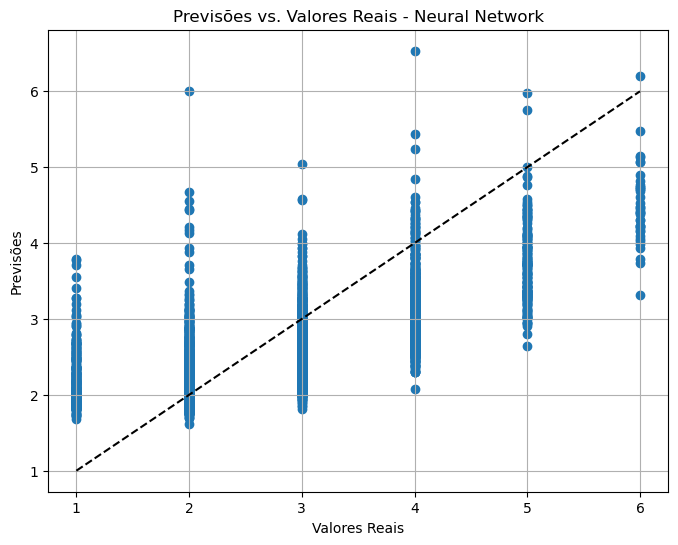

In [48]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt

# Função para visualizar as previsões e os valores reais para cada modelo
def plot_predictions(y_true, predictions, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, predictions)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--k')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(f'Previsões vs. Valores Reais - {model_name}')
    plt.grid(True)
    plt.show()

# Visualizar as previsões para cada modelo
for model_name, y_pred in predictions.items():
    plot_predictions(y_test, y_pred, model_name)

In [54]:
# Renomear as colunas no conjunto de teste
test_df.rename(columns={'num_words': 'word_count'}, inplace=True)

# Selecione as características relevantes para a entrada do modelo
X_test_final = test_df[['word_count', 'sentence_count', 'unique_words_ratio']]

# Faça as previsões usando o modelo de rede neural treinado
y_pred_final = best_model.predict(X_test_final)

# Crie um DataFrame com as previsões
submission_df = pd.DataFrame({'essay_id': test_df['essay_id'], 'predicted_score': y_pred_final})

In [55]:
submission_df.head()

,essay_id,predicted_score
0,000d118,3.080971
1,000fe60,2.525280
2,001ab80,3.356867
